<a href="https://colab.research.google.com/github/haritanair/Time-Series-Analysis_Agricultural-Dataset/blob/main/Codes_and_Output_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analyzing Crop Yield Determinants and Trends in India ***

# Time Series Analysis of Total Agricultural Yield


In [ ]:
####Objective:
### 1.To identify trends or seasonality if any, and forecast the total yield values for agricultural production over upcoming years using time series analysis

In [1]:
from google.colab import files
uploaded=files.upload()

Saving crop_yield.csv to crop_yield.csv


In [13]:
import pandas as pd
df=pd.read_csv("crop_yield.csv")
import numpy as np # linear algebra
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df.head()
df.tail()
print("Shape of the dataset : ",df.shape)
df.isnull().sum()
df.info()
# to check the unique values
for i in df.columns:
    print("",i,"*")
    print()
    print(set(df[i].tolist()))
    print()
    # Check the duplicates record
df.duplicated().sum()
df.describe()




Shape of the dataset :  (19689, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
 Crop *

{'Sweet potato', 'Niger seed', 'Castor seed', 'Gram', 'Guar seed', 'Urad', 'Other Summer Pulses', 'Cardamom', 'Arecanut', 'Sannhamp', 'Cashewnut', 'Maize', 'Oilseeds total', 'Cowpea(Lobia)', 'Linseed', 'Dry chillies', 'Groundnut', '

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


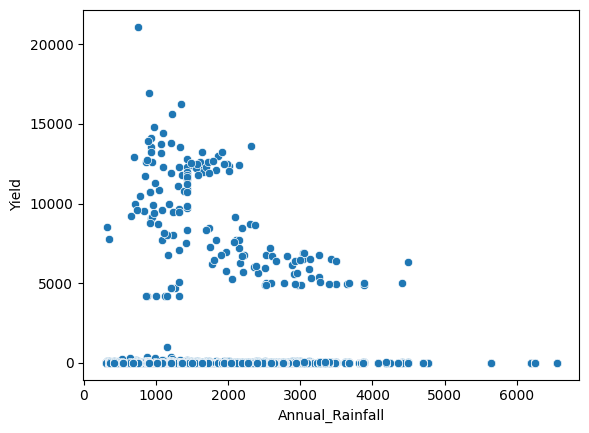

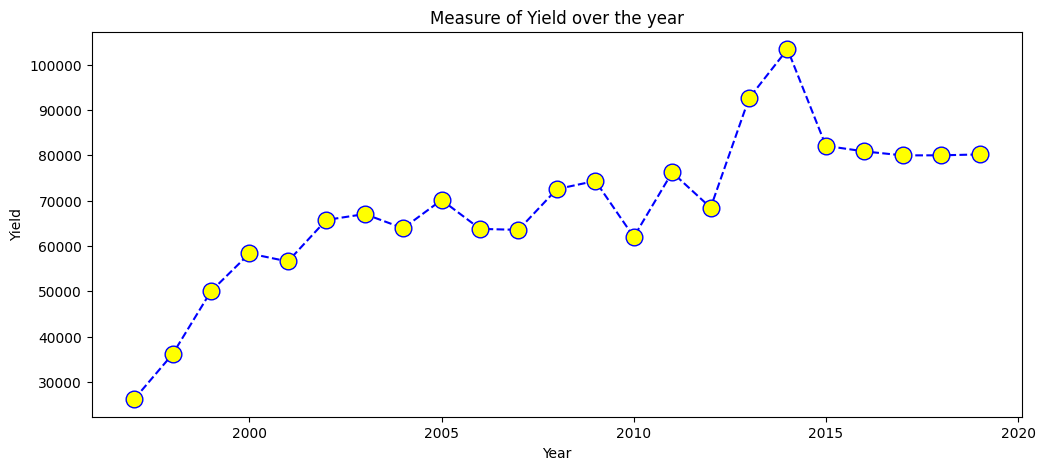

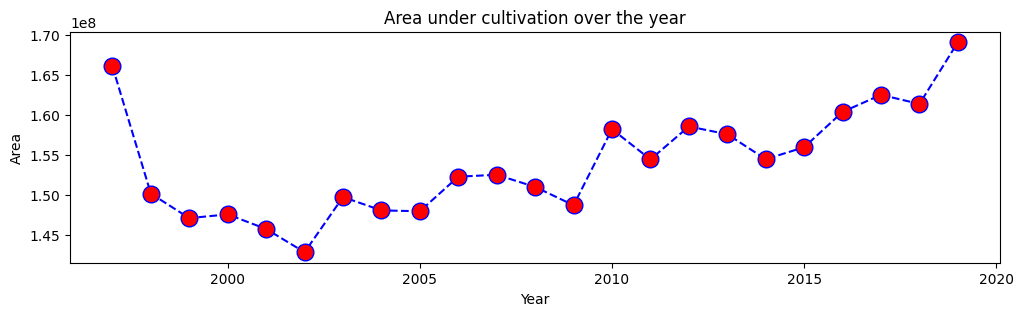

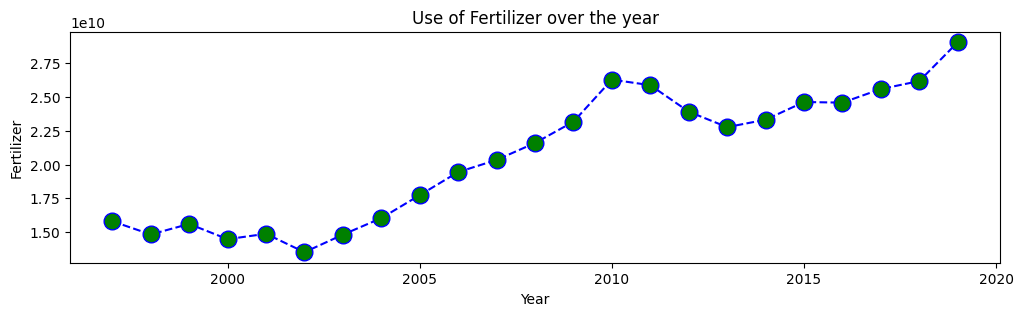

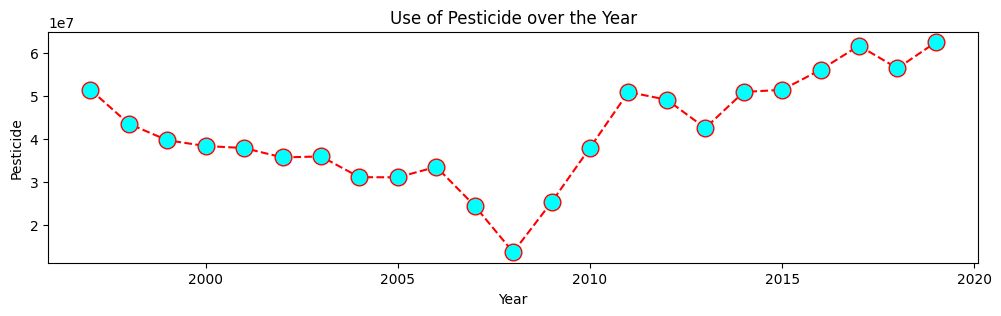

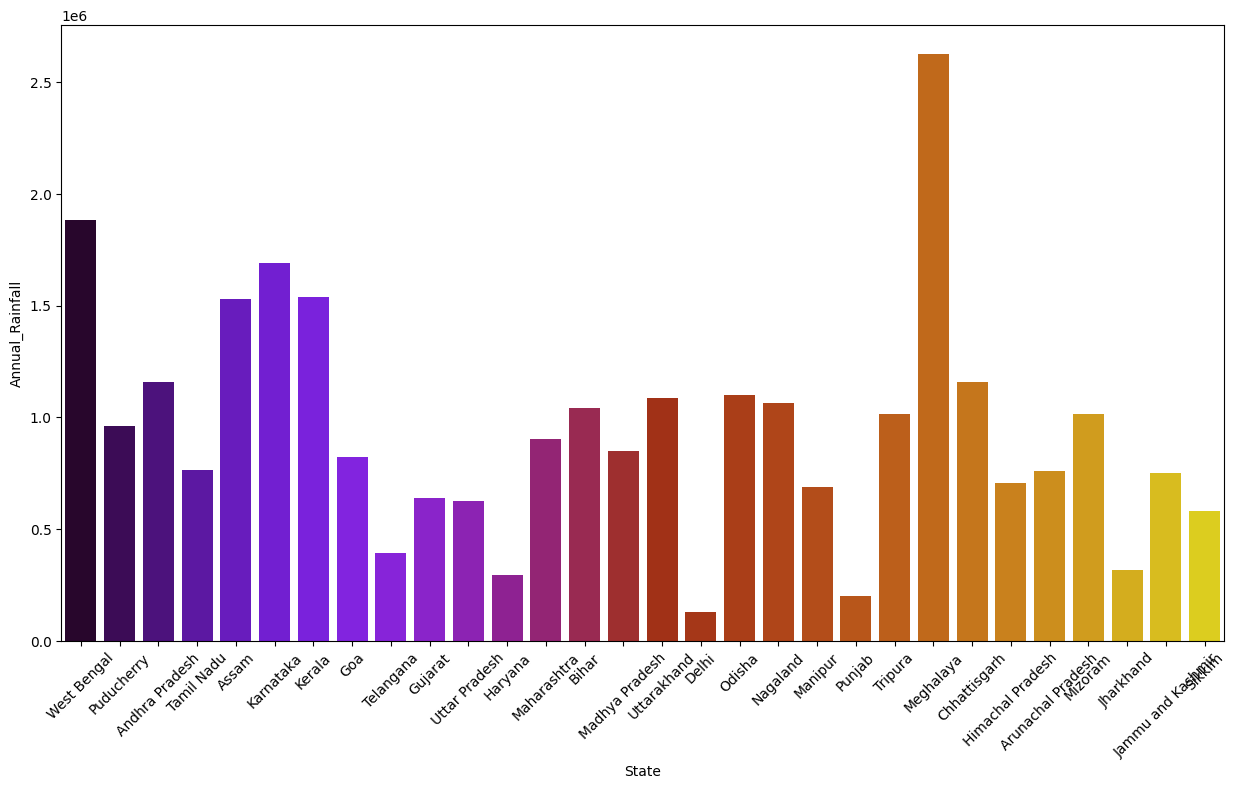

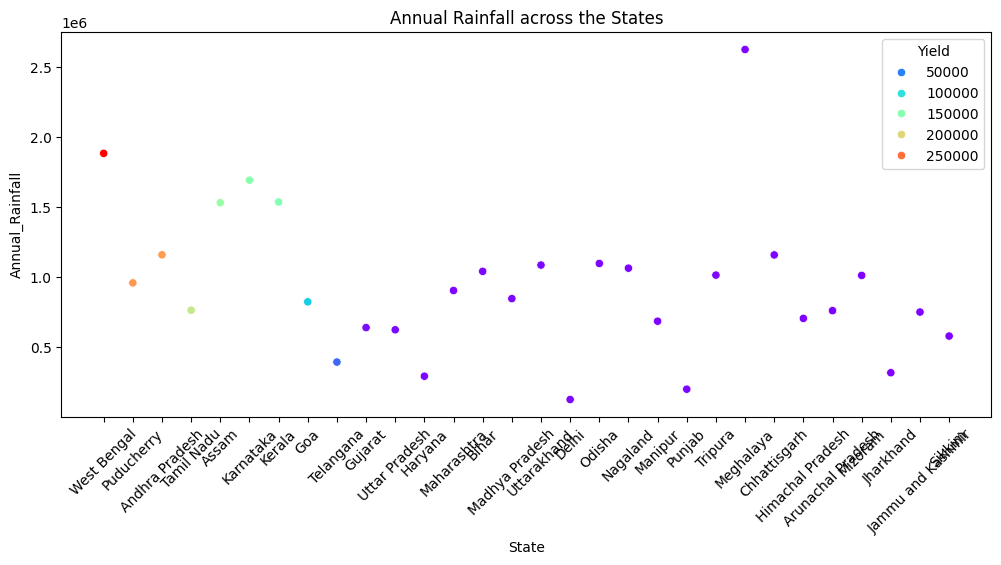

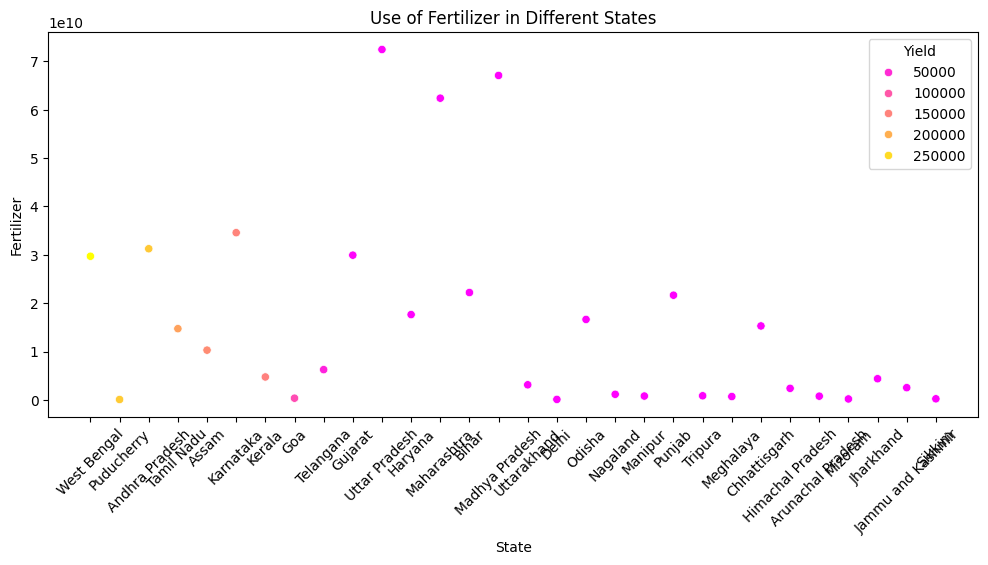

<Figure size 2500x1500 with 0 Axes>

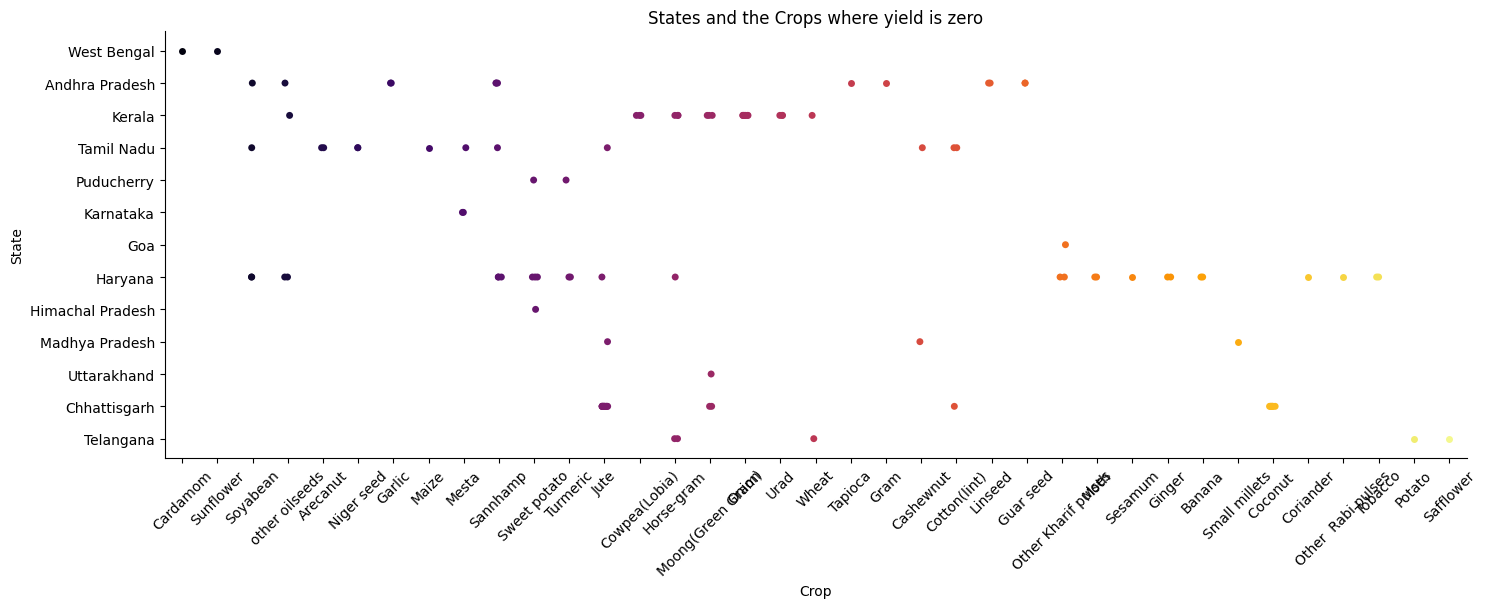

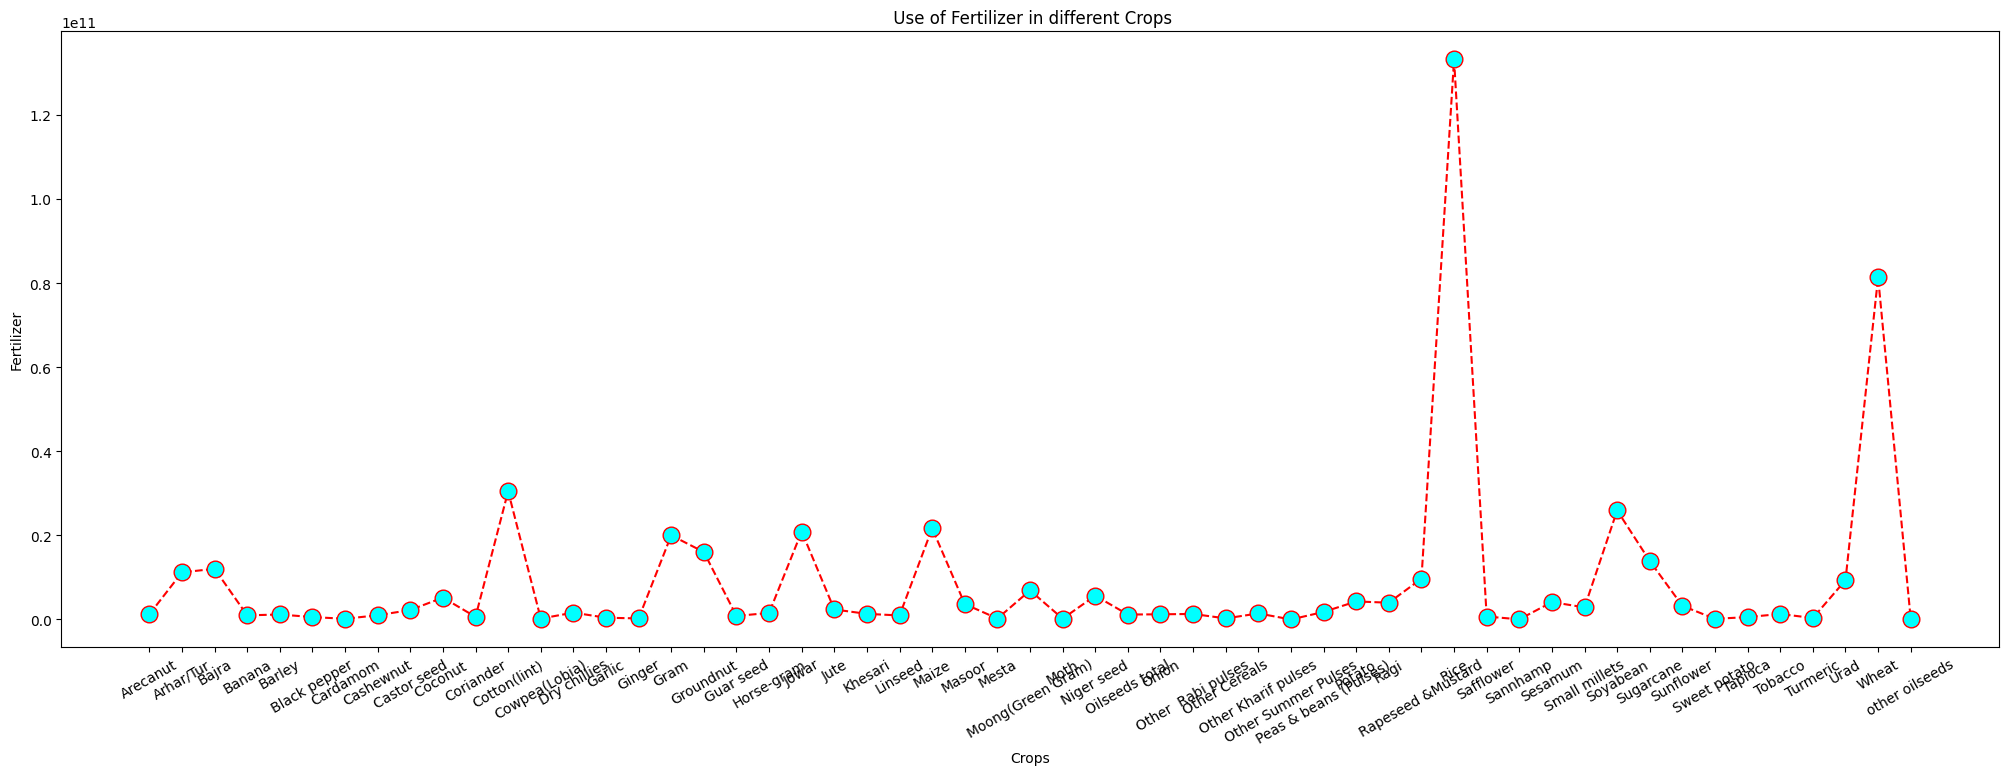

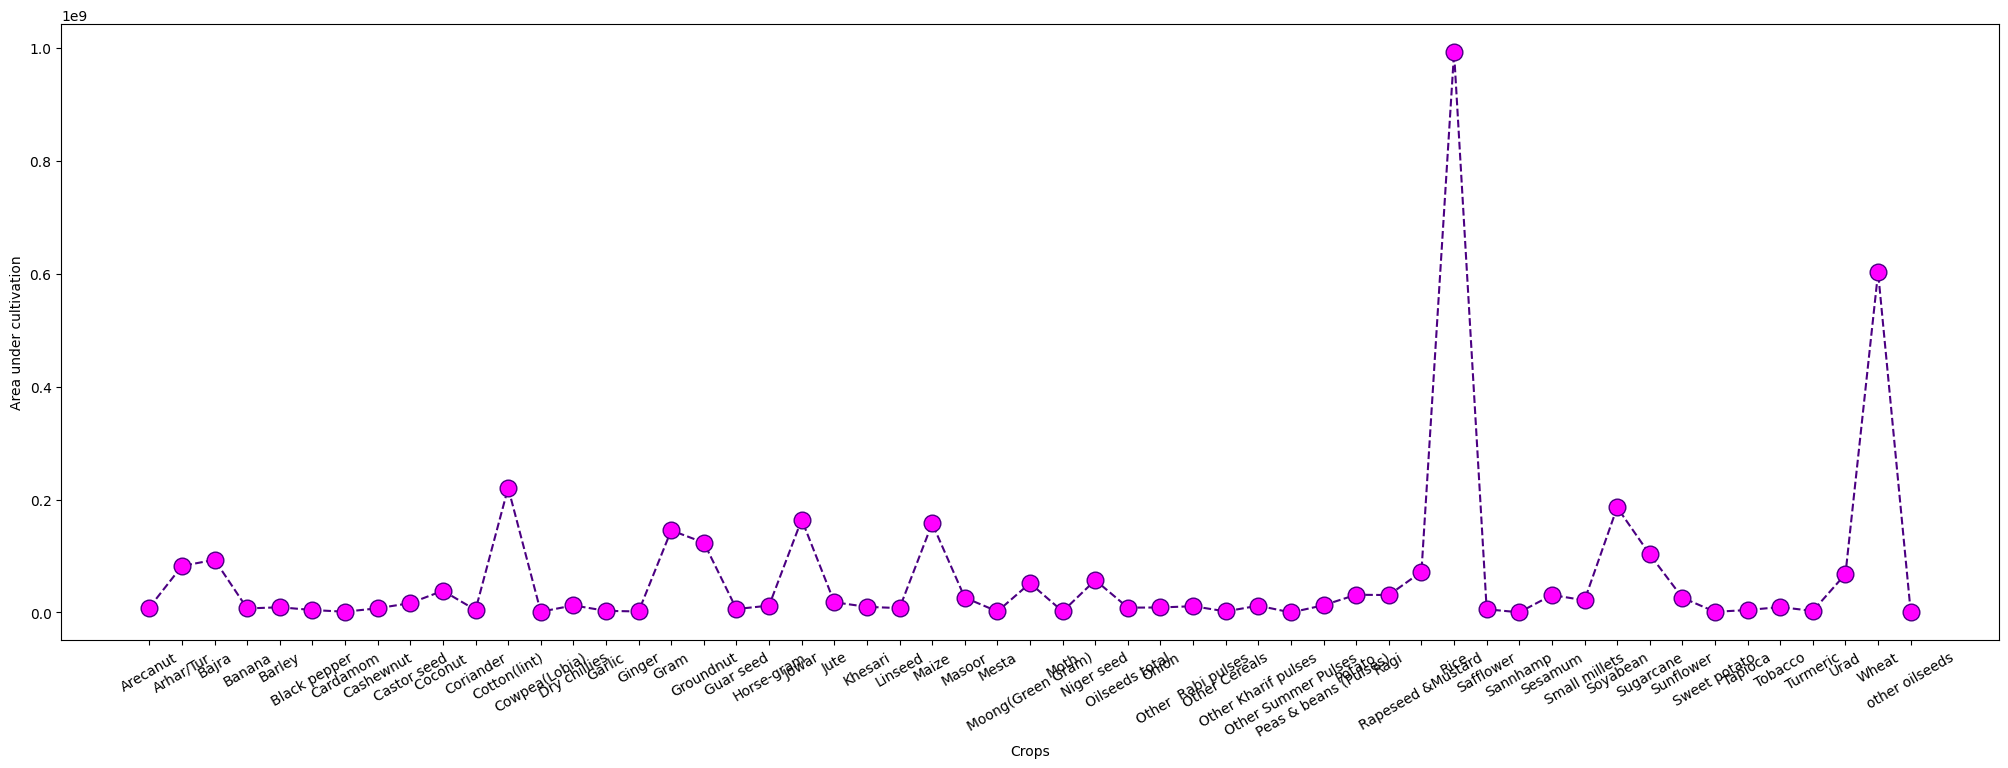

In [ ]:
#Data visualisation

sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show
#Yearwise analysis of agricultural production
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete
year_yield = df_year.groupby('Crop_Year').sum()
year_yield
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()
#State-wise analysis of agricultural production
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()
#Season-wise analysis
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])
fig.show()
#Crop wise Analysis
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape
df_yz.head()
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()


                                                        Crop  \
Crop_Year                                                      
1997       ArecanutArhar/TurCastor seedCoconut Cotton(lin...   
1998       ArecanutBajraBlack pepperCorianderCotton(lint)...   
1999       ArecanutArhar/TurBananaCastor seedCoconut Cott...   
2000       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2001       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2002       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2003       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2004       ArecanutArhar/TurBajraBajraBajraBananaBlack pe...   
2005       ArecanutArhar/TurBajraBajraBananaCashewnutCast...   
2006       ArecanutArecanutBananaBlack pepperCotton(lint)...   
2007       ArecanutBajraBananaBlack pepperCoconut Coriand...   
2008       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2009       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2010       ArecanutBajraBajraBananaBlack

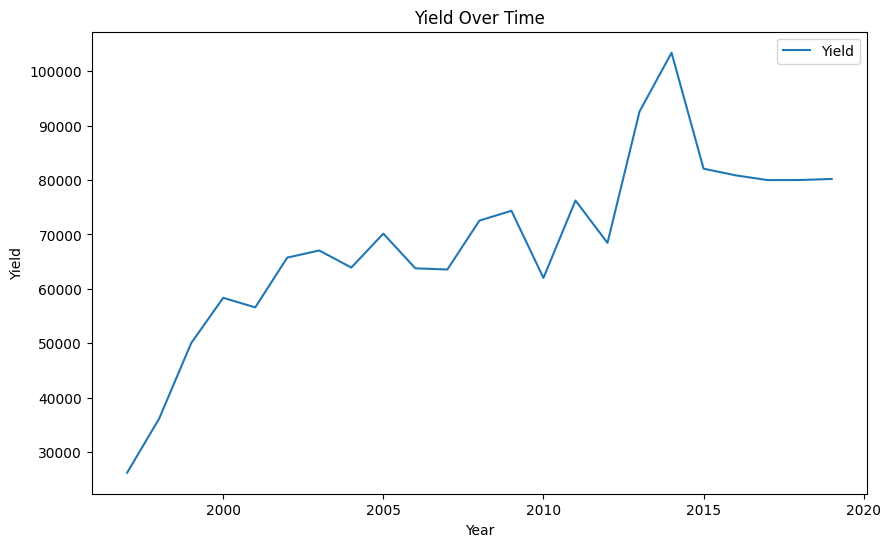

In [ ]:
#To perform a time series analysis on the year-wise total yield of all crops,
#we need to aggregate the yield data by year.
#Let's proceed with this aggregation and plot the results to visualize the trend over the years.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete
year_yield = df_year.groupby('Crop_Year').sum()
print(year_yield)
plt.figure(figsize=(10, 6))
plt.plot(year_yield['Yield'], label='Yield')
plt.title('Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.show()


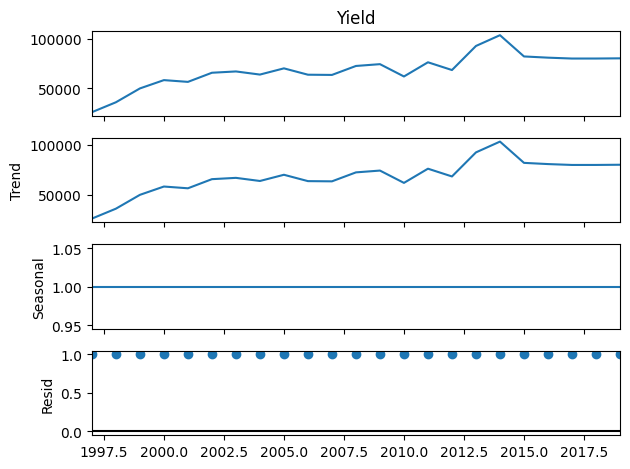

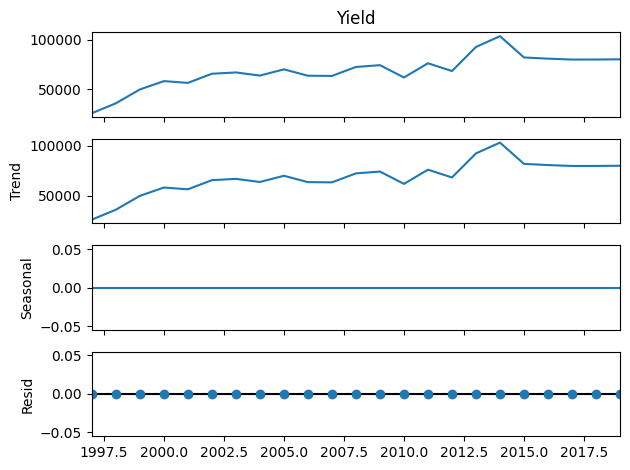

In [ ]:
#The choice of a multiplicative model for seasonal decomposition was based on a general assumption that the seasonal effects might change proportionally with the level of the series. However, this may not always be the most appropriate choice. The decision between a multiplicative and additive model typically depends on the nature of the data:

#Multiplicative Model: Assumes that the seasonal variations increase or decrease proportionally with the trend (e.g., higher yields have proportionally larger seasonal variations).
#Additive Model: Assumes that the seasonal variations are constant and do not depend on the trend (e.g., seasonal effects add a constant amount to the trend).
#To determine the most appropriate model for this dataset, we can also perform an additive decomposition and compare the results.

#Decomposing time series using multiplicative model
decomposition_mul = seasonal_decompose(year_yield['Yield'], model='multiplicative',period=1)
#Plot the decomposed components
decomposition_mul.plot()
plt.show()

## Perform time series decomposition using an additive model
result_additive = seasonal_decompose(year_yield['Yield'], model='additive', period=1)
# Plot the decomposed components
result_additive.plot()
plt.show()

#No Seasonality: The flat line in the seasonal component indicates that there is no detectable seasonality in your data. This means that the data does not have any repeating patterns or cycles at regular intervals (e.g., monthly, yearly).

#Perfectly Trend-Driven Data: The flat line in the residual component suggests that the time series is entirely explained by the trend component. There are no random fluctuations or noise left after removing the trend and (non-existent) seasonal components.

##Implications
#Stable and Predictable Data: The data is stable and predictable with no seasonal variations or irregular fluctuations. The entire variation in the data can be attributed to the trend.
#Simplified Analysis: We can focus on analyzing and modeling the trend component alone since there are no seasonal or residual variations to consider.


In [ ]:
# Check for stationarity using ADF test
adf_test = adfuller(year_yield['Yield'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
#The null hypothesis for the ADF test is that the data has a unit root (i.e., the data is non-stationary).
#A p-value greater than the typical alpha level (e.g., 0.05) indicates that we do not have enough evidence to reject the null hypothesis.
#Therefore data is non stationary

ADF Statistic: -1.2106647687953425
p-value: 0.6689912542519458


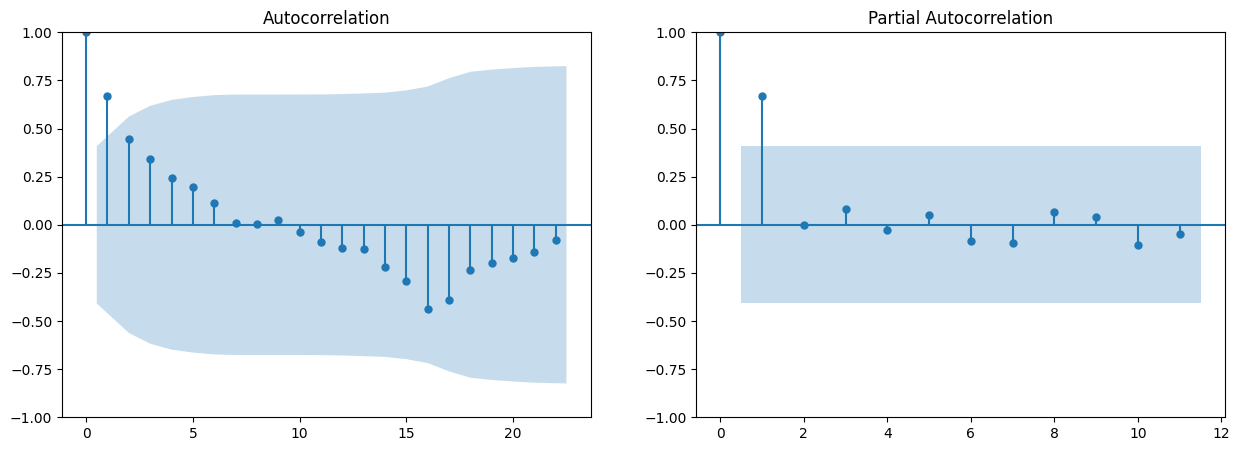

In [ ]:
#acf and pacf plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(year_yield['Yield'], lags=22, ax=axes[0])
plot_pacf(year_yield['Yield'], lags=11, ax=axes[1])
plt.show()

Crop_Year
1997             NaN
1998     9948.489891
1999    13877.172912
2000     8328.860432
2001    -1761.084380
2002     9153.619385
2003     1304.554041
2004    -3133.451820
2005     6234.669227
2006    -6375.340029
2007     -216.431919
2008     8985.638557
2009     1812.054039
2010   -12345.928402
2011    14228.244974
2012    -7780.437317
2013    24142.777651
2014    10808.893790
2015   -21322.317115
2016    -1217.617548
2017     -878.212965
2018       12.776009
2019      196.181889
Name: Yield_diff, dtype: float64


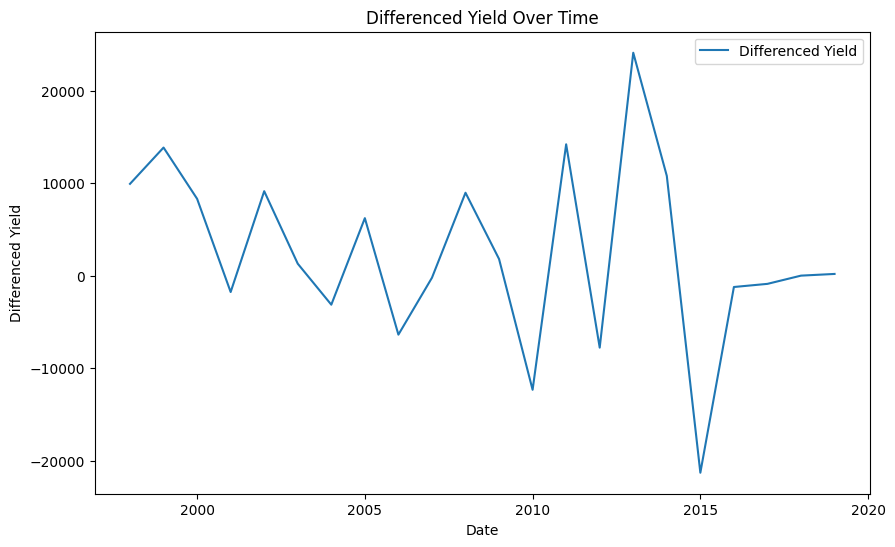

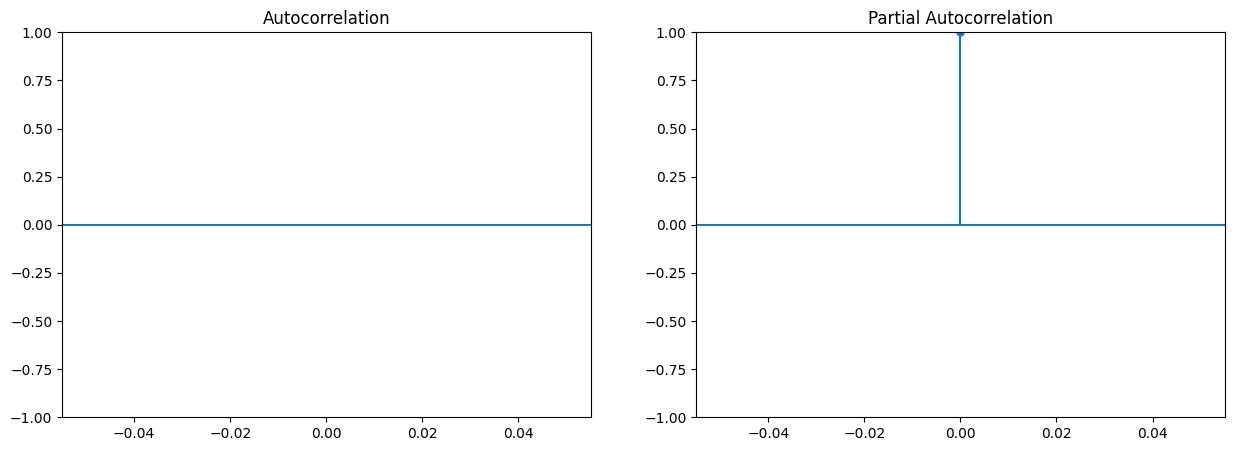

In [ ]:
#Differencing to achieve stationarity
year_yield['Yield_diff'] = year_yield['Yield'].diff().dropna()
print(year_yield['Yield_diff'])

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(year_yield['Yield_diff'], label='Differenced Yield')
plt.title('Differenced Yield Over Time')
plt.xlabel('Date')

plt.ylabel('Differenced Yield')
plt.legend()
plt.show()

#acf and pacf plots after differencing
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(year_yield['Yield_diff'],lags=22,ax=axes[0])
plot_pacf(year_yield['Yield_diff'],lags=11,ax=axes[1])
plt.show()
#If the PACF plot spikes to 1 at lag 0 but all other values are 0,
# it strongly suggests an autoregressive process of order 1 (AR(1)).

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.5 MB/s eta 0:00:00


In [ ]:
# Fit an ARIMA model using auto_arima
model_data = year_yield['Yield']
model_data.dropna(inplace=True)
model = auto_arima(model_data, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   seasonal=False,
                   d=None, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
##Model interpretation and validation
# Print the model summary
print(model.summary())

# Get the best model's parameters
print("ARIMA model parameters:", model.order)

#If auto_arima returns (0, 1, 0), it suggests that the time series
#is best modeled as a random walk, meaning the best prediction for
# tomorrow's value is simply today's value plus some random error.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=474.159, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=470.267, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=472.125, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=472.237, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=469.660, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.227 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -233.830
Date:                Mon, 30 Sep 2024   AIC                            469.660
Time:                        05:01:11   BIC                            470.751
Sample:                             0   HQIC                           469.917
                                 - 23                                         
Co

Ljung-Box test:
     lb_stat  lb_pvalue
10  6.486143   0.772901


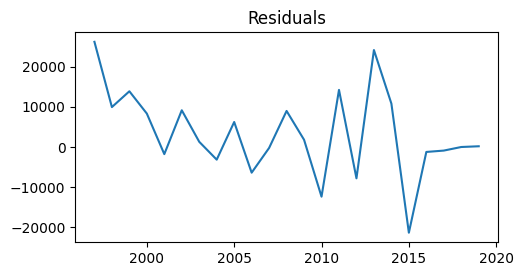

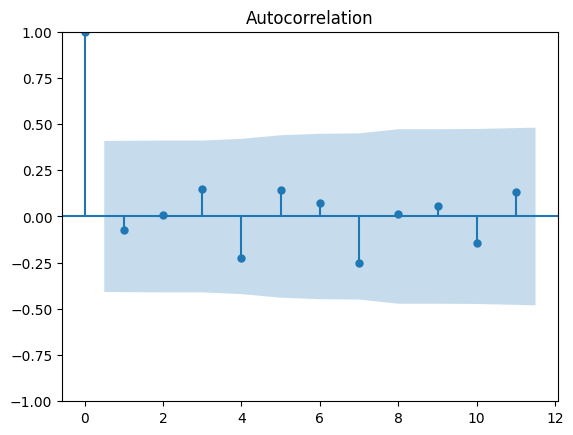

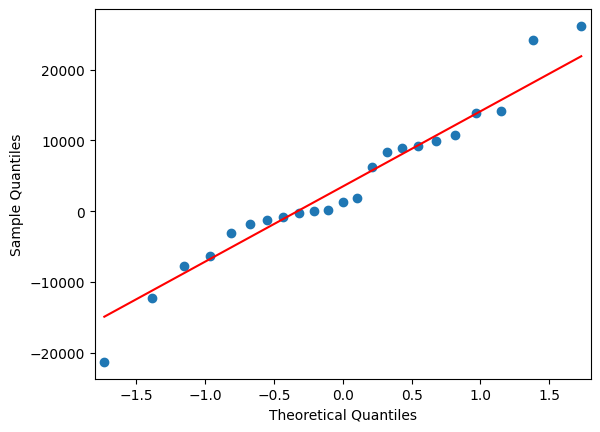

Shapiro-Wilk Test: Statistics=0.9722755956468756, p-value=0.7432640293983725


In [ ]:
#residual analysis : checking residuals to ensure they look like white noise(for validation)
#The goal is to verify that the residuals exhibit properties consistent with a well-fitted model,
#primarily that they resemble white noise—meaning they should be random, uncorrelated, and normally distributed with a constant variance.

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.tools.eval_measures import rmse
residuals = model.resid()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
#The residual plot shows no obvious patterns.
#There are no discernible patterns or trends in the residual plot,
#it suggests that the assumption of homoscedasticity is likely valid.
#This is a favorable outcome because it means that your model’s residuals exhibit
#consistent variance, which is essential for reliable statistical inference and model predictions.

#The ACF plot should have all values within the confidence intervals, indicating no significant autocorrelation.
#acf plot of residuals
sm.graphics.tsa.plot_acf(residuals)

# Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Ljung-Box test:')
print(lb_test)
#The Ljung-Box test is used to check for the presence of autocorrelation in the residuals of a time series model.
#A high p-value (greater than 0.05) suggests that we fail to reject the null hypothesis.
#This means there is no significant evidence of autocorrelation in the residuals up to the specified lag (in this case, lag 10).

#Checking for normality
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()
from scipy.stats import shapiro
#The points lie on or near the diagonal line so the data is normal
# Normality tests
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistics={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
# All of this indicate that the residuals are normally distributed.

# Therefore after residual analysis, we can confirm that the model is valid


Training set:
 Crop_Year
1997     26187.756592
1998     36136.246483
1999     50013.419395
2000     58342.279827
2001     56581.195447
2002     65734.814831
2003     67039.368873
2004     63905.917053
2005     70140.586280
2006     63765.246251
2007     63548.814332
2008     72534.452889
2009     74346.506928
2010     62000.578526
2011     76228.823500
2012     68448.386183
2013     92591.163834
2014    103400.057624
Name: Yield, dtype: float64
Testing set:
 Crop_Year
2015    82077.740509
2016    80860.122961
2017    79981.909996
2018    79994.686005
2019    80190.867894
Name: Yield, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                   18
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -180.900
Date:                Mon, 30 Sep 2024   AIC                            363.800
Time:                        05:01:21   BIC                            364.633

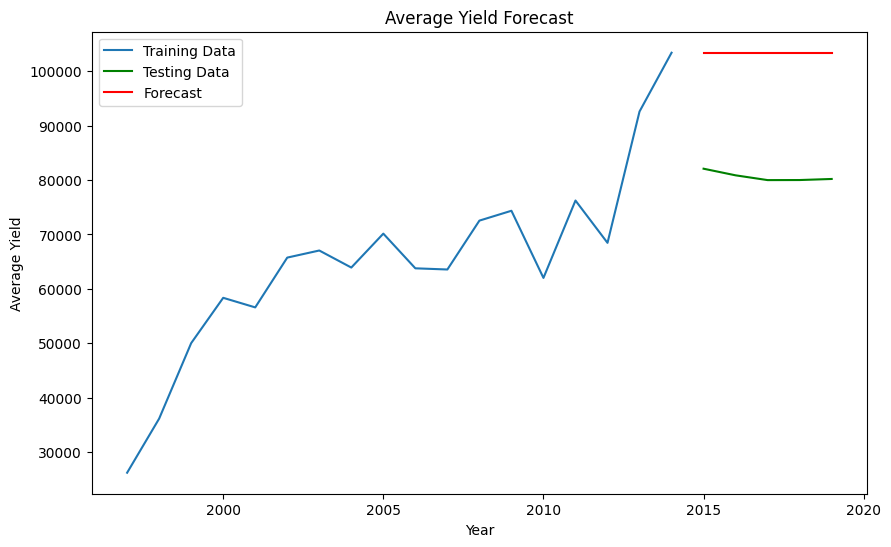

In [ ]:
import pandas as pd

time_series_data=year_yield['Yield']
# Train-Test Split
# Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.80)
train, test = time_series_data[:train_size], time_series_data[train_size:]

# Display the training and testing sets
print("Training set:\n", train)
print("Testing set:\n", test)

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(0, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


# Forecast for the testing period
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Yield Forecast')
plt.legend()
plt.show()




In [ ]:
# Forecast future values using get_forecast
forecast_object = model_fit.get_forecast(steps=6)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Convert to DataFrame for easy manipulation and plotting
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print(forecast_df)

         Forecast      Lower CI       Upper CI
18  103400.057624  84140.797579  122659.317668
19  103400.057624  76163.350868  130636.764379
20  103400.057624  70042.040711  136758.074536
21  103400.057624  64881.537535  141918.577712
22  103400.057624  60335.042968  146465.072279
23  103400.057624  56224.697692  150575.417556



#Time series analysis of Wheat crop yield in Maharashtra


2. To perform time series analysis on agricultural yield of Wheat in Maharashtra and to predict the yield values for upcoming years.

In [ ]:
wheat_maharashtra = df[(df['Crop'] == 'Wheat') & (df['State'] == 'Maharashtra')]
wheat_maharashtra_yearly = wheat_maharashtra.groupby('Crop_Year')['Yield'].sum()
print(wheat_maharashtra_yearly)


Crop_Year
1997    0.847600
1998    1.265000
1999    1.299655
2000    1.197000
2001    1.313793
2002    1.234333
2003    1.171667
2004    1.199667
2005    1.329333
2006    1.451667
2007    1.782333
2008    1.431667
2009    1.530000
2010    1.709333
2011    1.646667
2012    1.461034
2013    1.462414
2014    1.201379
2015    1.027813
2016    1.734839
2017    1.505484
2018    1.388667
2019    1.564000
Name: Yield, dtype: float64


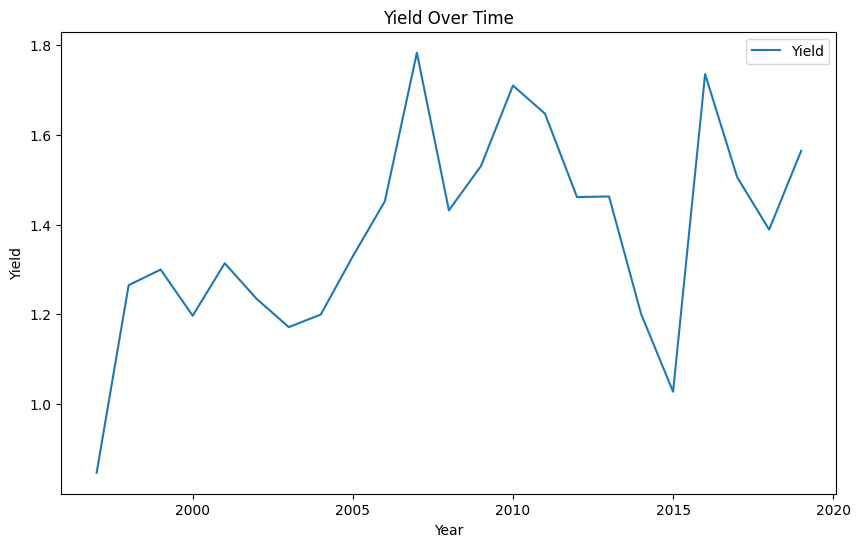

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(wheat_maharashtra_yearly, label='Yield')
plt.title('Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.show()

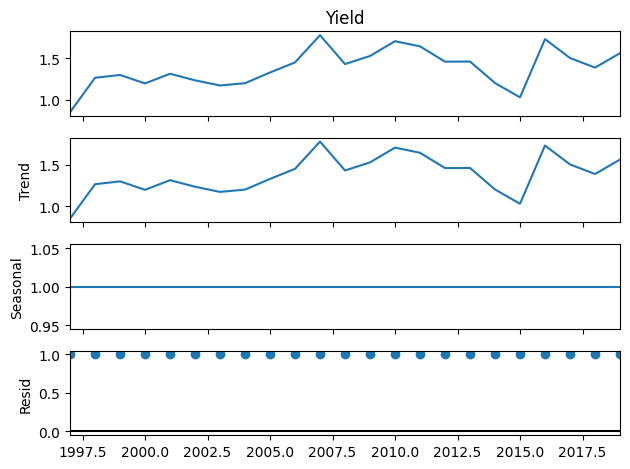

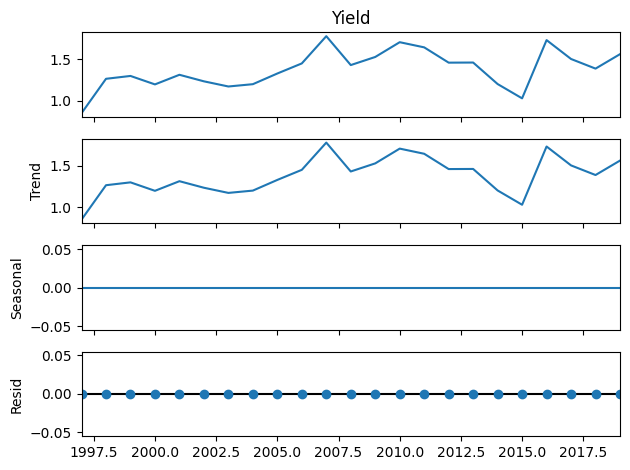

In [ ]:
#Decomposing time series using multiplicative model
decomposition_mul = seasonal_decompose(wheat_maharashtra_yearly, model='multiplicative',period=1)
#Plot the decomposed components
decomposition_mul.plot()
plt.show()

## Perform time series decomposition using an additive model
result_additive = seasonal_decompose(wheat_maharashtra_yearly, model='additive', period=1)
# Plot the decomposed components
result_additive.plot()
plt.show()

In [ ]:
# Check for stationarity using ADF test
adf_test = adfuller(wheat_maharashtra_yearly)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
# the data is stationary

ADF Statistic: -3.452796890373901
p-value: 0.00928542444693381


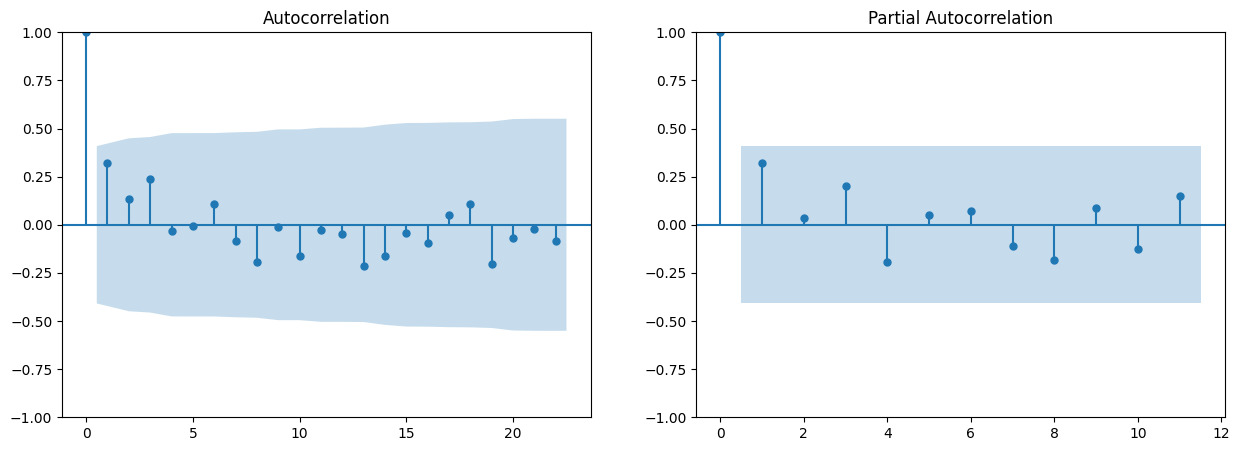

In [ ]:
#acf and pacf plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(wheat_maharashtra_yearly, lags=22, ax=axes[0])
plot_pacf(wheat_maharashtra_yearly, lags=11, ax=axes[1])
plt.show()

In [ ]:
# Fit an ARIMA model using auto_arima
model_data1 =wheat_maharashtra_yearly
model1 = auto_arima(model_data1, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   seasonal=False,
                   d=None, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
##Model interpretation and validation
# Print the model summary
print(model1.summary())

fmodel = ARIMA(model_data1, order=(0, 0, 1))
fit_model = fmodel.fit()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4.850, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82.709, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6.485, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6.068, Time=1.38 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1.027, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1.140, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.516, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=0.788, Time=0.90 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-0.862, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0

Ljung-Box test:
    lb_stat  lb_pvalue
10  8.24926   0.604504


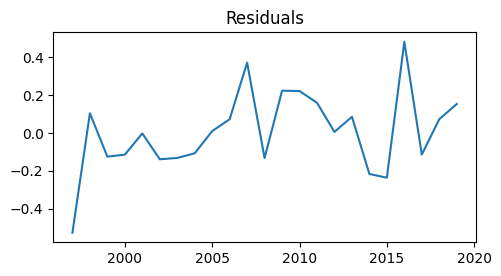

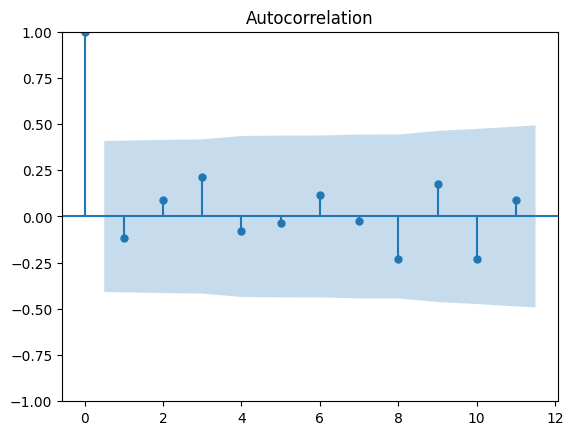

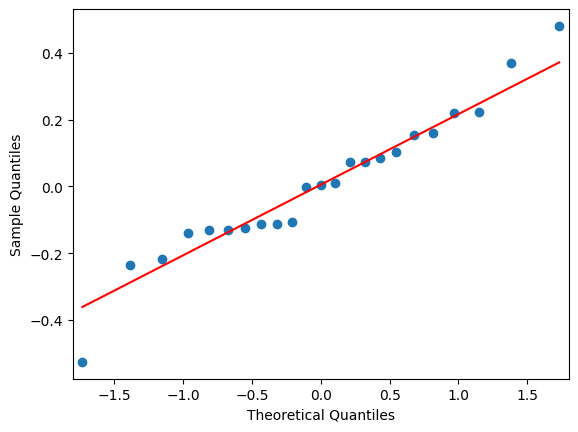

Shapiro-Wilk Test: Statistics=0.967269015827524, p-value=0.6239486771415153


In [ ]:
#residual analysis : checking residuals to ensure they look like white noise(for validation)
#The goal is to verify that the residuals exhibit properties consistent with a well-fitted model,
#primarily that they resemble white noise—meaning they should be random, uncorrelated, and normally distributed with a constant variance.

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.tools.eval_measures import rmse
residuals = model1.resid()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
#The residual plot shows no obvious patterns.
#There are no discernible patterns or trends in the residual plot,
#it suggests that the assumption of homoscedasticity is likely valid.
#This is a favorable outcome because it means that your model’s residuals exhibit
#consistent variance, which is essential for reliable statistical inference and model predictions.

#The ACF plot should have all values within the confidence intervals, indicating no significant autocorrelation.
#acf plot of residuals
sm.graphics.tsa.plot_acf(residuals)

# Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Ljung-Box test:')
print(lb_test)
#The Ljung-Box test is used to check for the presence of autocorrelation in the residuals of a time series model.
#A high p-value (greater than 0.05) suggests that we fail to reject the null hypothesis.
#This means there is no significant evidence of autocorrelation in the residuals up to the specified lag (in this case, lag 10).

#Checking for normality
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()
from scipy.stats import shapiro
#The points lie on or near the diagonal line so the data is normal
# Normality tests
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistics={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
# All of this indicate that the residuals are normally distributed.

# Therefore after residual analysis, we can confirm that the model is valid


In [ ]:
#finding forecast for the model
forecast = fit_model.forecast(steps=5)

# Print forecasted value
print(f"Forecast for next {5} period(s):")
print(forecast)
#After the initial forecast, subsequent forecasts will be the same as the first forecast value
#because the model does not capture any trend or seasonal variations
#(due to d=0 in ARIMA(0,0,1)) and assumes the series is stationary or fluctuates around a constant mean.



Forecast for next 5 period(s):
23    1.451771
24    1.373684
25    1.373684
26    1.373684
27    1.373684
Name: predicted_mean, dtype: float64


Training set:
 Crop_Year
1997    0.847600
1998    1.265000
1999    1.299655
2000    1.197000
2001    1.313793
2002    1.234333
2003    1.171667
2004    1.199667
2005    1.329333
2006    1.451667
2007    1.782333
2008    1.431667
2009    1.530000
2010    1.709333
2011    1.646667
2012    1.461034
2013    1.462414
2014    1.201379
Name: Yield, dtype: float64
Testing set:
 Crop_Year
2015    1.027813
2016    1.734839
2017    1.505484
2018    1.388667
2019    1.564000
Name: Yield, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                   18
Model:                 ARIMA(0, 0, 1)   Log Likelihood                   4.378
Date:                Mon, 30 Sep 2024   AIC                             -2.756
Time:                        05:02:17   BIC                             -0.085
Sample:                             0   HQIC                            -2.388
                              

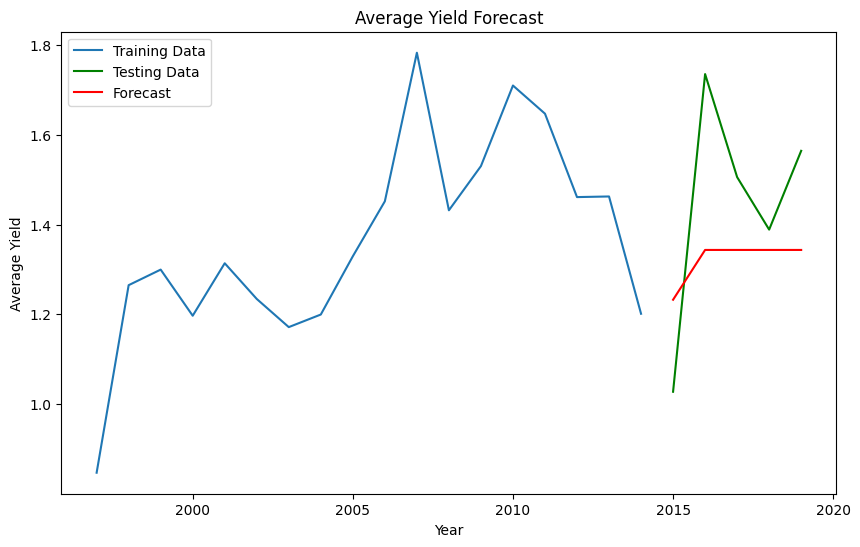

In [ ]:
import pandas as pd

time_series_data=wheat_maharashtra_yearly
# Train-Test Split
# Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

# Display the training and testing sets
print("Training set:\n", train)
print("Testing set:\n", test)

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(0, 0, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast for the testing period
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index


# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Yield Forecast')
plt.legend()
plt.show()


In [ ]:

# Forecast future values using get_forecast
forecast_object = model_fit.get_forecast(steps=6)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Convert to DataFrame for easy manipulation and plotting
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print(forecast_df)

    Forecast  Lower CI  Upper CI
18  1.232593  0.864437  1.600749
19  1.343406  0.923331  1.763482
20  1.343406  0.923331  1.763482
21  1.343406  0.923331  1.763482
22  1.343406  0.923331  1.763482
23  1.343406  0.923331  1.763482


# Using Non-Parametric Tests

 To assess how seasonal variations influence crop production and yield.

In [3]:
import pandas as pd
df= pd.read_csv("crop_yield.csv")
df_year = df[df['Crop_Year']!=2020]
df1=df[['Season','Production','Yield']]
df1
df1 = df1[df1['Season'] != 'Whole Year ']
df1
df1=df[['Season','Production','Yield']]
df1
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=False)
df1
df1.head()
df1.columns


Index(['Production', 'Yield', 'Season_Autumn     ', 'Season_Kharif     ',
       'Season_Rabi       ', 'Season_Summer     ', 'Season_Whole Year ',
       'Season_Winter     '],
      dtype='object')

                    Production     Yield  Season_Autumn       \
Production            1.000000  0.570809           -0.009044   
Yield                 0.570809  1.000000           -0.012688   
Season_Autumn        -0.009044 -0.012688            1.000000   
Season_Kharif        -0.050848 -0.074770           -0.124228   
Season_Rabi          -0.038886 -0.056959           -0.094036   
Season_Summer        -0.015686 -0.022273           -0.037254   
Season_Whole Year     0.125004  0.182928           -0.070700   
Season_Winter        -0.008057 -0.012069           -0.020807   

                    Season_Kharif       Season_Rabi         \
Production                   -0.050848           -0.038886   
Yield                        -0.074770           -0.056959   
Season_Autumn                -0.124228           -0.094036   
Season_Kharif                 1.000000           -0.543887   
Season_Rabi                  -0.543887            1.000000   
Season_Summer                -0.215469           -0

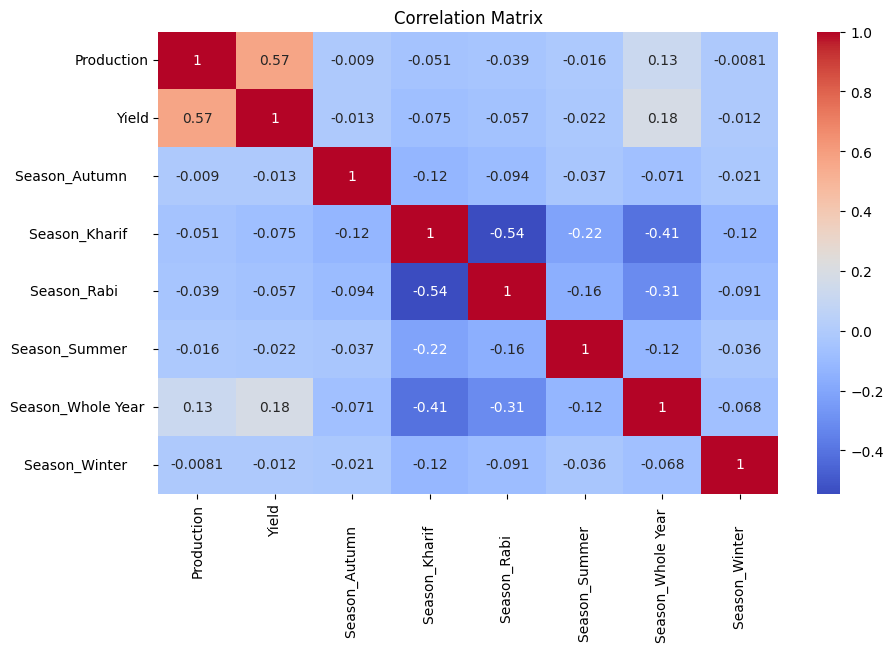

In [4]:
# Calculate the correlation matrix
correlation_matrix = df1[['Production', 'Yield', 'Season_Autumn     ', 'Season_Kharif     ',
       'Season_Rabi       ', 'Season_Summer     ', 'Season_Whole Year ',
       'Season_Winter     '] ].corr()
# Display the correlation matrix
print(correlation_matrix)
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

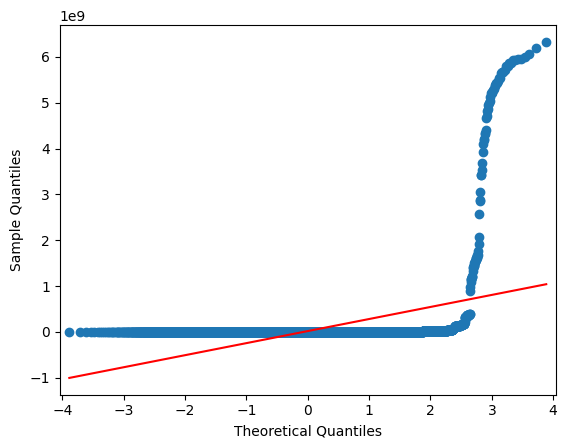

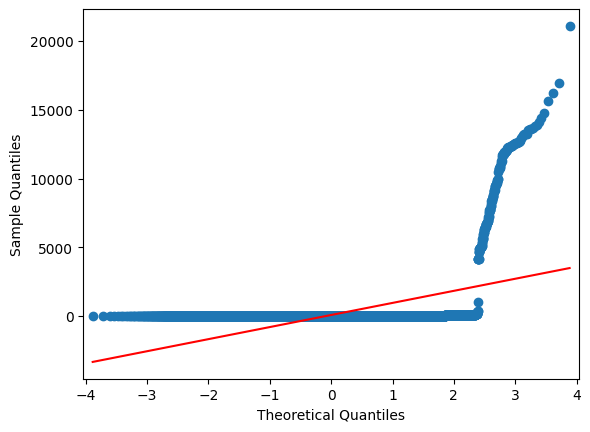

<Figure size 1200x600 with 0 Axes>

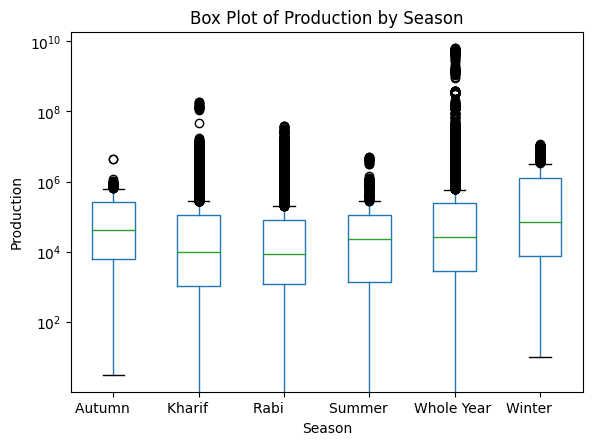

In [5]:
# QQ plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df1['Production'], line='s')
sm.qqplot(df1['Yield'], line='s')
plt.show()
#to check outliers
import pandas as pd
import matplotlib.pyplot as plt
# Assuming df is the original DataFrame
df1 = df[['Season', 'Production', 'Yield']]
# Create box plot for 'Production' grouped by 'Season'
plt.figure(figsize=(12, 6))
df1.boxplot(column='Production', by='Season', grid=False)
plt.title('Box Plot of Production by Season')
plt.suptitle('') # Remove the automatic 'Boxplot grouped by ...' title
plt.xlabel('Season')
plt.ylabel('Production')
plt.yscale('log')
plt.show()

<Figure size 1200x600 with 0 Axes>

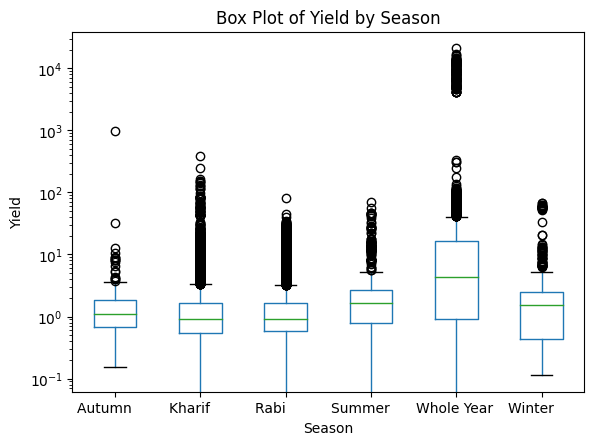

In [6]:
# Create box plot for 'Yield' grouped by 'Season'
plt.figure(figsize=(12, 6))
df1.boxplot(column='Yield', by='Season', grid=False)
plt.title('Box Plot of Yield by Season')
plt.suptitle('') # Remove the automatic 'Boxplot grouped by ...' title
plt.xlabel('Season')
plt.ylabel('Yield')
plt.yscale('log')
plt.show()
import pandas as pd

In [7]:
# Sample DataFrame setup
df1 = df[['Season', 'Production', 'Yield']]
# Function to compute IQR and identify outliers
def identify_outliers_iqr(data, column):
    # The following lines were not indented, causing the error.
    # They are now indented to be part of the function body.
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
# Identify outliers in 'Production'
outliers_production, lower_bound_production, upper_bound_production = identify_outliers_iqr(df1, 'Production')
print("Outliers in Production:")
print(outliers_production)
# Identify outliers in 'Yield'
outliers_yield, lower_bound_yield, upper_bound_yield = identify_outliers_iqr(df1, 'Yield')
print("Outliers in Yield:")
print(outliers_yield)

Outliers in Production:
            Season  Production        Yield
3      Whole Year    126905000  5238.051739
7      Kharif           904095     9.919565
14     Whole Year       671871     7.561304
16     Autumn           398311     0.780870
18     Winter          1647296     0.941304
...            ...         ...          ...
19671  Summer           925810     2.586071
19672  Winter          6280410     1.982333
19676  Winter           417672    57.584545
19686  Kharif           440900     1.285000
19688  Rabi             392160     1.261818

[3373 rows x 3 columns]
Outliers in Yield:
            Season  Production        Yield
3      Whole Year    126905000  5238.051739
7      Kharif           904095     9.919565
14     Whole Year       671871     7.561304
21     Kharif          1287451    41.896957
54     Whole Year     28999269    91.747368
...            ...         ...          ...
19618  Winter           344294    56.160400
19636  Winter            41812    11.955455
19647  W

In [8]:
# Sample DataFrame setup
df1 = df[['Season', 'Production', 'Yield']]
# Function to compute IQR and identify outliers
def identify_outliers_iqr(data, column):
    # Indent the lines within the function body
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
# Identify outliers in 'Production'
outliers_production, lower_bound_production, upper_bound_production = identify_outliers_iqr(df1, 'Production')
print("Outliers in Production:")
print(outliers_production)
# Identify outliers in 'Yield'
outliers_yield, lower_bound_yield, upper_bound_yield = identify_outliers_iqr(df1, 'Yield')
print("Outliers in Yield:")
print(outliers_yield)

Outliers in Production:
            Season  Production        Yield
3      Whole Year    126905000  5238.051739
7      Kharif           904095     9.919565
14     Whole Year       671871     7.561304
16     Autumn           398311     0.780870
18     Winter          1647296     0.941304
...            ...         ...          ...
19671  Summer           925810     2.586071
19672  Winter          6280410     1.982333
19676  Winter           417672    57.584545
19686  Kharif           440900     1.285000
19688  Rabi             392160     1.261818

[3373 rows x 3 columns]
Outliers in Yield:
            Season  Production        Yield
3      Whole Year    126905000  5238.051739
7      Kharif           904095     9.919565
14     Whole Year       671871     7.561304
21     Kharif          1287451    41.896957
54     Whole Year     28999269    91.747368
...            ...         ...          ...
19618  Winter           344294    56.160400
19636  Winter            41812    11.955455
19647  W

In [9]:
# Optionally, remove outliers from the DataFrame
df1_no_outliers = df1[
(df1['Production'] >= lower_bound_production) &
(df1['Production'] <= upper_bound_production) &
(df1['Yield'] >= lower_bound_yield) &
(df1['Yield'] <= upper_bound_yield)
]
print("DataFrame without outliers:")
print(df1_no_outliers)


DataFrame without outliers:
            Season  Production     Yield
0      Whole Year        56708  0.796087
1      Kharif             4685  0.710435
2      Kharif               22  0.238333
4      Kharif              794  0.420909
5      Whole Year         9073  0.643636
...            ...         ...       ...
19682  Kharif            37000  1.225714
19683  Kharif           205000  1.441429
19684  Kharif             2000  0.500000
19685  Rabi               3000  3.000000
19687  Kharif             5488  0.016667

[14364 rows x 3 columns]


Levene statistic: 11.421436948606773
p-value: 6.551542827876902e-11
Levene statistic: 30.120552470375078
p-value: 9.361906942548552e-30
Kruskal-Wallis H-Test for Production: H-statistic=407.05744526657327, p-value=8.935070791461708e-86
Kruskal-Wallis H-Test for Yield: H-statistic=1880.0783438429316, p-value=0.0


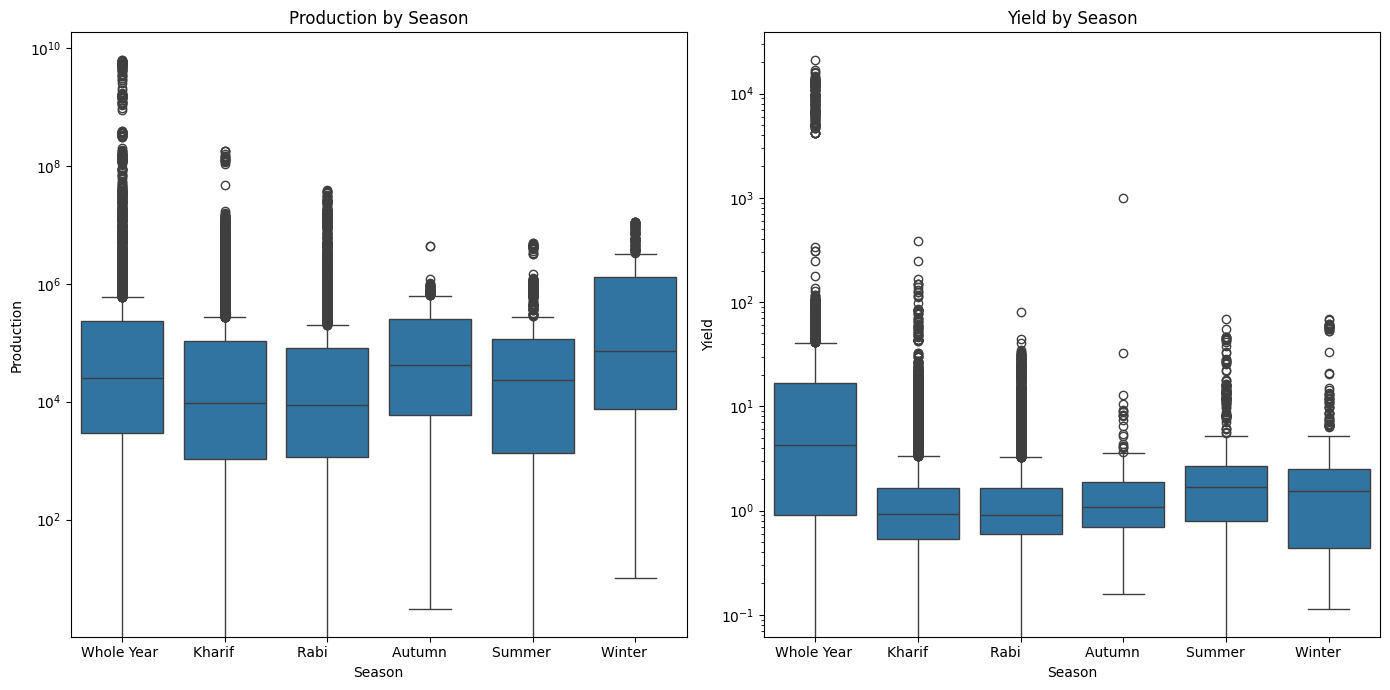

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, levene
import seaborn as sns
import matplotlib.pyplot as plt

data=df1
# Prepare data for Kruskal-Wallis H-Test
seasons = data['Season'].unique()

# Convert Production and Yield data to NumPy arrays with consistent dimensions
production_groups = [data[data['Season'] == season]['Production'].values for season in seasons]
yield_groups = [data[data['Season'] == season]['Yield'].values for season in seasons]

# Ensure all groups have the same length for levene test
min_length = min(len(group) for group in production_groups)
production_groups_equal_length = [group[:min_length] for group in production_groups]


# Perform Levene's test on the groups with equal lengths
stat, p = levene(*production_groups_equal_length)

print('Levene statistic:', stat)
print('p-value:', p)
# Ensure all groups have the same length for levene test
min_length = min(len(group) for group in yield_groups)
yield_groups_equal_length = [group[:min_length] for group in yield_groups]


# Perform Levene's test on the groups with equal lengths
stat, p = levene(*yield_groups_equal_length)

print('Levene statistic:', stat)
print('p-value:', p)

# Perform Kruskal-Wallis H-Test for Production
kruskal_production_stat, kruskal_production_p = kruskal(*production_groups)

# Perform Kruskal-Wallis H-Test for Yield
kruskal_yield_stat, kruskal_yield_p = kruskal(*yield_groups)

# Display results
print(f'Kruskal-Wallis H-Test for Production: H-statistic={kruskal_production_stat}, p-value={kruskal_production_p}')
print(f'Kruskal-Wallis H-Test for Yield: H-statistic={kruskal_yield_stat}, p-value={kruskal_yield_p}')

# Visualize the data
plt.figure(figsize=(14, 7))

# Boxplot for Production by Season
plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='Production', data=data)
plt.title('Production by Season')
plt.yscale('log')  # Log scale for better visualization

# Boxplot for Yield by Season
plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='Yield', data=data)
plt.title('Yield by Season')
plt.yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

Dunn's Test Results for Production:
              Autumn        Kharif        Rabi          Summer       \
Autumn       1.000000e+00  5.914386e-14  2.883591e-15  2.591658e-06   
Kharif       5.914386e-14  1.000000e+00  1.000000e+00  2.407102e-02   
Rabi         2.883591e-15  1.000000e+00  1.000000e+00  2.235935e-03   
Summer       2.591658e-06  2.407102e-02  2.235935e-03  1.000000e+00   
Whole Year   4.330617e-01  3.483309e-45  1.613673e-46  4.086921e-07   
Winter       9.506502e-02  1.221042e-28  2.721772e-30  6.248368e-16   

              Whole Year    Winter       
Autumn       4.330617e-01  9.506502e-02  
Kharif       3.483309e-45  1.221042e-28  
Rabi         1.613673e-46  2.721772e-30  
Summer       4.086921e-07  6.248368e-16  
Whole Year   1.000000e+00  1.404518e-07  
Winter       1.404518e-07  1.000000e+00  

Dunn's Test Results for Yield:
              Autumn        Kharif         Rabi          Summer       \
Autumn       1.000000e+00  1.552233e-01   7.333915e-01  3.589552e-07

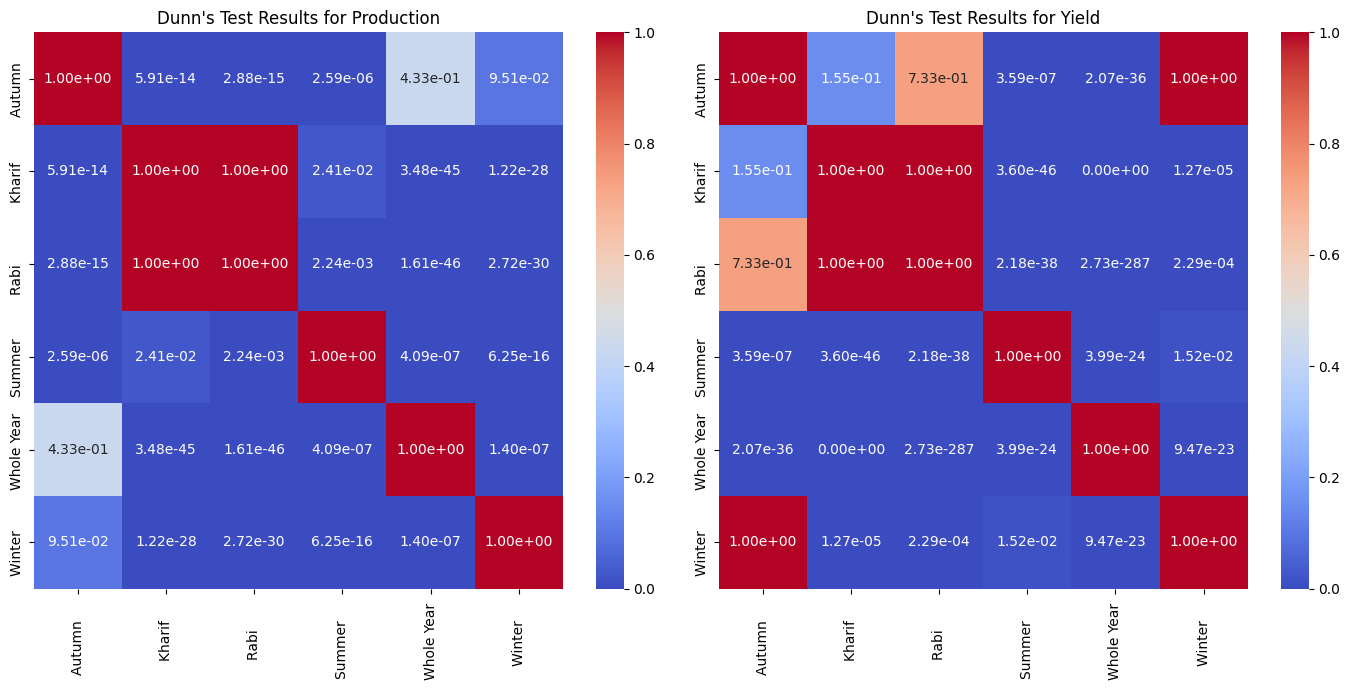

In [12]:
!pip install scikit-posthocs

import scikit_posthocs as sp
# Perform Dunn's test for Production
dunn_production = sp.posthoc_dunn(data, val_col='Production', group_col='Season', p_adjust='bonferroni')

# Perform Dunn's test for Yield
dunn_yield = sp.posthoc_dunn(data, val_col='Yield', group_col='Season', p_adjust='bonferroni')

# Display results
print("Dunn's Test Results for Production:")
print(dunn_production)

print("\nDunn's Test Results for Yield:")
print(dunn_yield)

# Visualize the results using a heatmap
plt.figure(figsize=(14, 7))

# Heatmap for Dunn's test results for Production
plt.subplot(1, 2, 1)
sns.heatmap(dunn_production, annot=True, fmt=".2e", cmap="coolwarm")
plt.title("Dunn's Test Results for Production")

# Heatmap for Dunn's test results for Yield
plt.subplot(1, 2, 2)
sns.heatmap(dunn_yield, annot=True, fmt=".2e", cmap="coolwarm")
plt.title("Dunn's Test Results for Yield")

plt.tight_layout()
plt.show()


*For production

Significant Differences:
Autumn shows significant differences in production compared to Kharif, Rabi, and Summer but not compared to Whole Year or Winter. Kharif shows significant differences compared to Summer, Whole Year, and Winter but not compared to Rabi. Rabi shows significant differences compared to Summer, Whole Year, and Winter. Summer shows significant differences compared to all other seasons. Whole Year shows significant differences compared to all other seasons except Autumn. Winter shows significant differences compared to all other seasons except Autumn.

For yield

Significant Differences:
Autumn shows significant differences in yield compared to Summer and Whole Year but not compared to Kharif, Rabi, or Winter. Kharif shows significant differences compared to Summer, Whole Year, and Winter but not compared to Rabi. Rabi shows significant differences compared to Summer, Whole Year, and Winter. Summer shows significant differences compared to all other seasons. Whole Year shows significant differences compared to all other seasons except Autumn. Winter shows significant differences compared to all other seasons except Autumn.*